# <center>Comparison_Community_detection JN</center>
This jupyter-notebook is used to show the difference between multiple methods to detemine communities for basins
detection.



# Method 1: Regular gridded nodes using Louvian algorithm

<br>

Notes:
1. Produces more nodes than an irregular grid (nodes that reprsent equal area)

    


/home/bogumil/anaconda3/envs/ExoCcycle/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42216/42216 [00:12<00:00, 3431.17it/s]


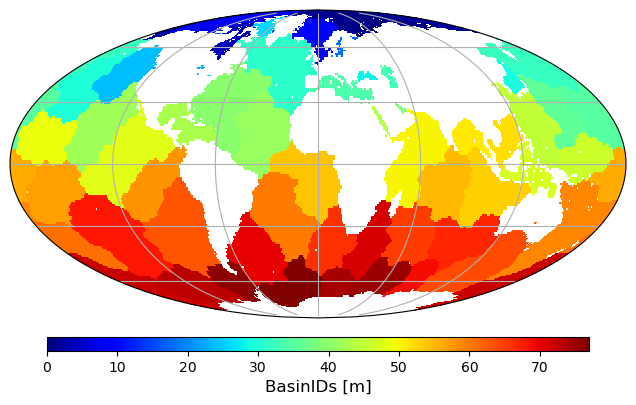

In [1]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np


# Initial basin definition class
body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basins = EC.utils.Basins(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

# Define basins based on user input boundaries
basins.defineBasins(minBasinCnt = 3,
                    method = "Louvain",
                    reducedRes={"on":True,"factor":1},
                    read=False,
                    write=False,
                    verbose=False)


# Define BasinIDA

# Define array for basinIDs and corresponding node ids (use the reduced resolution)
nodePosDict = basins.G.nodes.data('pos');
nodeBasinID = basins.G.nodes.data('basinID');
pos = np.zeros( (len(nodePosDict), 2) );
BasinID = np.zeros( (len(nodeBasinID), 1) );
for i in range(len(nodePosDict)):
    pos[i,:] = nodePosDict[i];
    BasinID[i] = nodeBasinID[i]['basinID'];

BasinIDA = np.empty(np.shape(basins.lon));
BasinIDA[:] = np.nan;
for nodei in range(len(pos[:,1])):
    BasinIDA[(basins.lon==pos[nodei,1])&(basins.lat==pos[nodei,0])] = BasinID[nodei];

basins.BasinIDA = BasinIDA;

# Plot
EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                    outputDir = os.getcwd(),
                    fidName = "plotGlobal.png",
                    cmapOpts={"cmap":"jet",
                              "cbar-title":"cbar-title",
                              "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                    pltOpts={"valueType": "BasinIDs",
                             "valueUnits": "m",
                             "plotTitle":"",
                             "plotZeroContour":False},
                    savePNG=False,
                    saveSVG=False)



# Method 2: Irregular gridded (equal area) nodes using Louvian algorithm

<br>

Notes:
1. Produces less nodes than an regular grid method
2. Requires two interpolations 1) Data used to determine connection strength from regular to irregular grid and 2) BasinIDs on irregular grid to basinIDs regular grid. Both interpolations are nearest neighbor.



/home/bogumil/anaconda3/envs/ExoCcycle/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:6457: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
sh: 1: temp.txt: not found


Duplicates removed: 1306
Grid saved to: EA_Nodes_1.0_xyz.txt


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24441/24441 [00:04<00:00, 5114.69it/s]


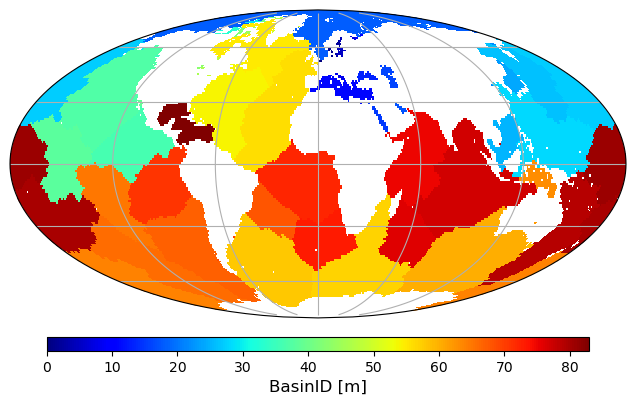

In [1]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np
import networkx as nx



# Initial basin definition class

body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

# Define basins based on user input boundaries
basins.defineBasins(minBasinCnt = 3,
                    method = "Louvain",
                    reducedRes={"on":True,"factor":1},
                    read=False,
                    write=True,
                    verbose=False)


basins.interp2regularGrid(mask=True)


EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                    outputDir = os.getcwd(),
                    fidName = "plotGlobal.png",
                    cmapOpts={"cmap":"jet",
                              "cbar-title":"cbar-title",
                              "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                    pltOpts={"valueType": "BasinID",
                             "valueUnits": "m",
                             "plotTitle":"",
                             "plotZeroContour":False},
                    savePNG=False,
                    saveSVG=False)



Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:6457: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:3210: RuntimeWarning: invalid value encountered in divide
  self.bathymetryConDist[ symmeticIndex[0], symmeticIndex[1] ] = 100*(bathymetryConDisti/np.sum(bathymetryConDisti));


Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exi

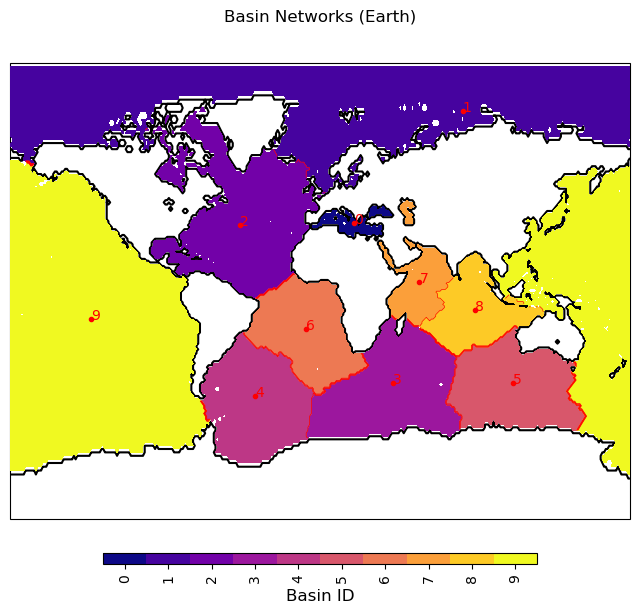

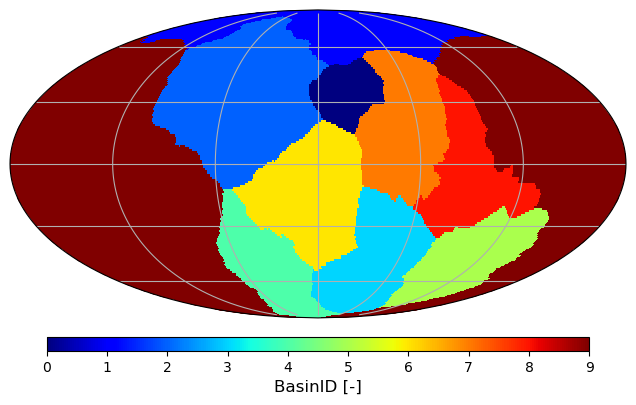

In [5]:
# Test merging

## Copy basins object
import copy as cp

## Get merging package
mergePackage = EC.utils.mergerPackages(package = 'Lite')

## Merge basins
basins.reducedRes = 1;
basins.applyMergeBasinMethods(0,
                                mergePackage,
                                maxBasinCnt=10);

## Calculate BasinIDA again
basins.interp2regularGrid(mask=True)

## Plot
EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                    outputDir = os.getcwd(),
                    fidName = "plotGlobal.png",
                    cmapOpts={"cmap":"jet",
                              "cbar-title":"cbar-title",
                              "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                    pltOpts={"valueType": "BasinID",
                             "valueUnits": "-",
                             "plotTitle":"",
                             "plotZeroContour":False},
                    savePNG=False,
                    saveSVG=False)



# Method 2: Irregular gridded (equal area) nodes using Louvian algorithm

<br>

Notes:
1. Produces less nodes than an regular grid method
2. Requires two interpolations 1) Data used to determine connection strength from regular to irregular grid and 2) BasinIDs on irregular grid to basinIDs regular grid. Both interpolations are nearest neighbor.



/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:6448: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))


Duplicates removed: 154
Grid saved to: EA_Nodes_10.0_xyz.txt


sh: 1: temp.txt: not found
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 301/301 [00:00<00:00, 24517.14it/s]


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  19  21  22  23  32  38  39  40  43  47  48  52  56  60  64  65  66  67
  68  69  72  77  82  83  88  89  90  93  94  97  98 102 103 108 118 124
 125 126 128 129 130 134 135 140 142 143 145 147 148 151 152 154 157 158
 159 160 164 165 170 199 200 205 210 217 218 219 220 221 222 224 225 230
 231 234 235 236 243 247 248 251 252 255 257 291 292 295 296 297 298 300] nodes have only 3 edges shared with other nodes. This should occur for 8 nodes.
[] nodes have 5 edges shared with other nodes. This should not occur for any nodes.


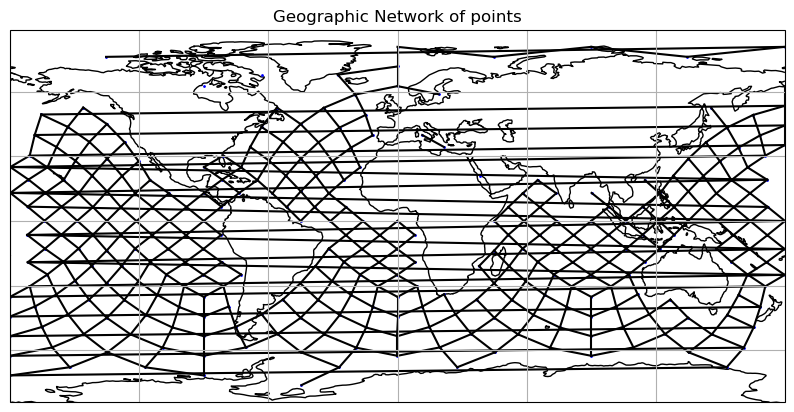

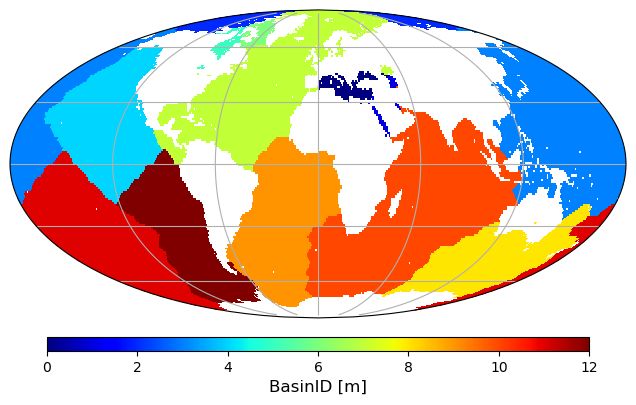

In [2]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np
import networkx as nx



# Initial basin definition class

body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

# Define basins based on user input boundaries
basins.defineBasins(minBasinCnt = 3,
                    method = "Louvain",
                    reducedRes={"on":True,"factor":10},
                    read=False,
                    write=True,
                    verbose=True)


basins.interp2regularGrid(mask=True)


EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                    outputDir = os.getcwd(),
                    fidName = "plotGlobal.png",
                    cmapOpts={"cmap":"jet",
                              "cbar-title":"cbar-title",
                              "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                    pltOpts={"valueType": "BasinID",
                             "valueUnits": "m",
                             "plotTitle":"",
                             "plotZeroContour":False},
                    savePNG=False,
                    saveSVG=False)

# Method 3: Irregular gridded (equal area) nodes using Girvan-Newman algorithm

<br>

Notes:
1. Produces less nodes than an regular grid method
2. Requires two interpolations 1) Data used to determine connection strength from regular to irregular grid and 2) BasinIDs on irregular grid to basinIDs regular grid. Both interpolations are nearest neighbor.


In [ ]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np
import networkx as nx



# Initial basin definition class

body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

# Define basins based on user input boundaries
basins.defineBasins(minBasinCnt = 13,
                    method = "Girvan-Newman",
                    reducedRes={"on":True,"factor":10},
                    read=False,
                    write=True,
                    verbose=True)



basins.interp2regularGrid(mask=True)


EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                    outputDir = os.getcwd(),
                    fidName = "plotGlobal.png",
                    cmapOpts={"cmap":"jet",
                              "cbar-title":"cbar-title",
                              "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                    pltOpts={"valueType": "BasinID",
                             "valueUnits": "m",
                             "plotTitle":"",
                             "plotZeroContour":False},
                    savePNG=True,
                    saveSVG=False)

# Comparisons with Irregular gridded (equal area) nodes using Louvian, Girvan-Newman, and Louvian-Girvan-Newman composite algorithm

<br>



Notes:
1. add
2. add


#### Louvain Stage

/home/bogumil/anaconda3/envs/ExoCcycle/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Storing images in figures/DetectionMethods/EAgrid_L_etopo_0


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:7050: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))


Duplicates removed: 1306
Grid saved to: EA_Nodes_1.0_xyz.txt


sh: 1: temp.txt: not found
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24441/24441 [00:06<00:00, 3988.22it/s]


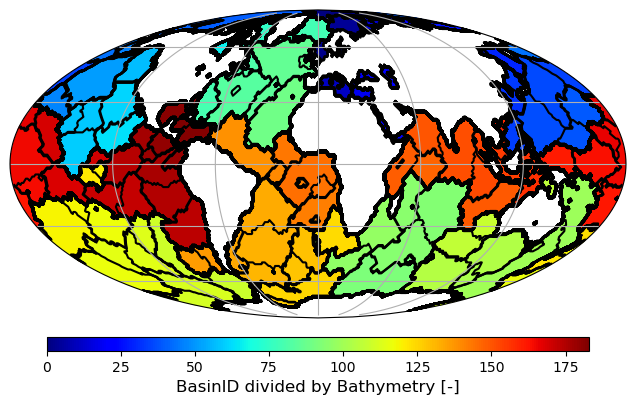

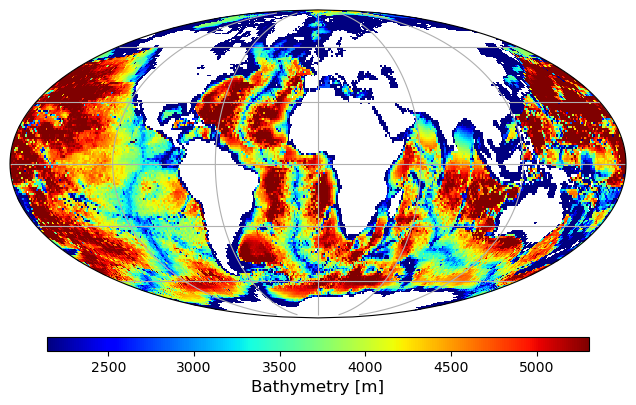

In [1]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset


# Make folder to hold figure results
!mkdir -p figures/DetectionMethods
fldName = EC.utils.makeFolderSeries(fldBase='figures/DetectionMethods/EAgrid_L_etopo')

print("Storing images in {}".format(fldName))

# Short readme text to write to folder with images
readmetxt = "Note that the bathymetry values are shown with a colorbar that represents 1 std that are area weighted.";
readmetxt += "\nUsing propertyInv/distanceV edge weight";
readmetxt += "\nUsing Louvain algorithm";
readmetxt += "\nLouvain resolution: 1";
readmetxt += "\nCommunity merger package is None";


with open(fldName+"/readme.txt", "w") as text_file:
    text_file.write(readmetxt)



# Initial basin definition class
body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

# Define the equal area node options s.t. salinity is used for edge connections 
#basins.EAinputs['dataGrid'] = os.getcwd()+"/GLORYS12V1/so_average_{0}_{1}m.nc".format(depthRange[0], depthRange[1])
#basins.EAinputs['parameter'] = "z"


# Define basins based on user input boundaries.
# For the Louvain-Girvan-Newman composite algorithm the variable
# minBasinCnt refers to the number of basins to maintain that are
# not completely isolated after running the louvain algorithm.
basins.defineBasins(minBasinCnt = 30,
                    method = "Louvain",
                    reducedRes={"on":True,"factor":1},
                    read=False,
                    write=True,
                    verbose=False)


# Define basin merging criteria
#mergerPackage = EC.utils.mergerPackages('Lite');
#mergerPackage['mergeSmallBasins']['threshold'] = [0.1, 0.5]
#mergerPackage['verbose'] = False;

# Merge communities based off criteria 
#basins.applyMergeBasinMethods(mergerID=0, mergerPackage=mergerPackage)

# Convert basinID equal area grid to regular grid
basins.interp2regularGrid(mask=True)


# Plot results of community IDs
EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                    outputDir = os.getcwd()+"/"+fldName,
                    fidName = "plotGlobal_Bathymetry_Basins.png",
                    cmapOpts={"cmap":"jet",
                              "cbar-title":"cbar-title",
                              "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                    pltOpts={"valueType": "BasinID divided by Bathymetry",
                             "valueUnits": "-",
                             "plotTitle":"",
                             "plotZeroContour":False,
                             "plotIntegerContours":True,
                             "transparent":True},
                    savePNG=True,
                    saveSVG=False)


# Write temp.nc that only has lat/lon/value
basins.simplifyNetCDF(inputPath=basins.EAinputs['dataGrid'],
                    outputPath='tempSimp.nc',
                    parameter=basins.EAinputs['parameter'])
# Read netCDF4
nc = Dataset('tempSimp.nc')
XX, YY = np.meshgrid(nc['lon'][:].data, nc['lat'][:].data)

# Calculate area weighted average and standard deviation (for plotting)
areaWeights, longitudes, latitudes, totalArea, totalAreaCalculated = EC.utils.areaWeights(resolution=np.diff(nc['lon'][:].data)[0],
                                                                                          LonStEd = [-180,180],
                                                                                          LatStEd = [-90,90])
ave, std = EC.utils.weightedAvgAndStd(nc['z'][:].data, areaWeights)

# Plot PSU at depth interval
EC.utils.plotGlobal(YY, XX, nc['z'][:].data,
                    outputDir = os.getcwd()+"/"+fldName,
                    fidName = "plotGlobal_Bathymetry.png",
                    cmapOpts={"cmap":"jet",
                              "cbar-title":"cbar-title",
                              "cbar-range":[ave-1*std,
                                            ave+1*std]},
                    pltOpts={"valueType": "Bathymetry",
                             "valueUnits": "m",
                             "plotTitle":"",
                             "plotZeroContour":False,
                             "transparent":True},
                    savePNG=True,
                    saveSVG=False)
nc.close()


#### Girvan-Newman Stage

Storing images in figures/DetectionMethods/EAgrid_CLGN_etopo_0


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:7050: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
sh: 1: temp.txt: not found


Duplicates removed: 1306
Grid saved to: EA_Nodes_1.0_xyz.txt


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24441/24441 [00:06<00:00, 3876.98it/s]


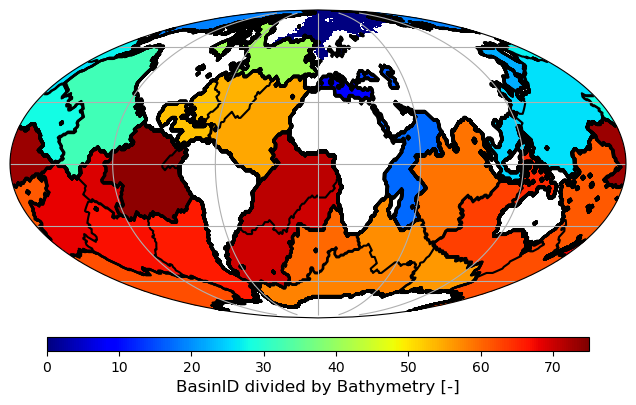

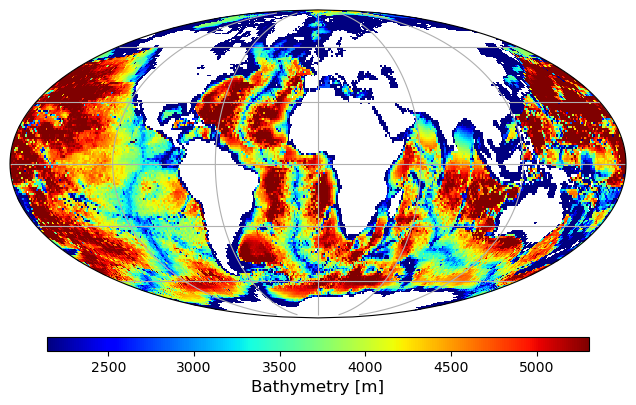

In [2]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset


# Make folder to hold figure results
!mkdir -p figures/DetectionMethods
fldName = EC.utils.makeFolderSeries(fldBase='figures/DetectionMethods/EAgrid_CLGN_etopo')

print("Storing images in {}".format(fldName))

# Short readme text to write to folder with images
readmetxt = "Note that the bathymetry values are shown with a colorbar that represents 1 std that are area weighted.";
readmetxt += "\nUsing propertyInv/distanceV edge weight";
readmetxt += "\nUsing Louvain-Girvan-Newman algorithm";
readmetxt += "\nLouvain resolution: 1";
readmetxt += "\nGirvan-Newman minimum unisolated basins: 30";
readmetxt += "\nCommunity merger package is None";


with open(fldName+"/readme.txt", "w") as text_file:
    text_file.write(readmetxt)


# Initial basin definition class
body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

# Define the equal area node options s.t. salinity is used for edge connections 
#basins.EAinputs['dataGrid'] = os.getcwd()+"/GLORYS12V1/so_average_{0}_{1}m.nc".format(depthRange[0], depthRange[1])
#basins.EAinputs['parameter'] = "z"


# Define basins based on user input boundaries.
# For the Louvain-Girvan-Newman composite algorithm the variable
# minBasinCnt refers to the number of basins to maintain that are
# not completely isolated after running the louvain algorithm.
basins.defineBasins(minBasinCnt = 30,
                    method = "Louvain-Girvan-Newman",
                    reducedRes={"on":True,"factor":1},
                    read=False,
                    write=True,
                    verbose=False)


# Define basin merging criteria
#mergerPackage = EC.utils.mergerPackages('Lite');
#mergerPackage['mergeSmallBasins']['threshold'] = [0.1, 0.5]
#mergerPackage['verbose'] = False;

# Merge communities based off criteria 
#basins.applyMergeBasinMethods(mergerID=0, mergerPackage=mergerPackage)

# Convert basinID equal area grid to regular grid
basins.interp2regularGrid(mask=True)


# Plot results of community IDs
EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                    outputDir = os.getcwd()+"/"+fldName,
                    fidName = "plotGlobal_Bathymetry_Basins.png",
                    cmapOpts={"cmap":"jet",
                              "cbar-title":"cbar-title",
                              "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                    pltOpts={"valueType": "BasinID divided by Bathymetry",
                             "valueUnits": "-",
                             "plotTitle":"",
                             "plotZeroContour":False,
                             "plotIntegerContours":True,
                             "transparent":True},
                    savePNG=True,
                    saveSVG=False)


# Write temp.nc that only has lat/lon/value
basins.simplifyNetCDF(inputPath=basins.EAinputs['dataGrid'],
                    outputPath='tempSimp.nc',
                    parameter=basins.EAinputs['parameter'])
# Read netCDF4
nc = Dataset('tempSimp.nc')
XX, YY = np.meshgrid(nc['lon'][:].data, nc['lat'][:].data)

# Calculate area weighted average and standard deviation (for plotting)
areaWeights, longitudes, latitudes, totalArea, totalAreaCalculated = EC.utils.areaWeights(resolution=np.diff(nc['lon'][:].data)[0],
                                                                                          LonStEd = [-180,180],
                                                                                          LatStEd = [-90,90])
ave, std = EC.utils.weightedAvgAndStd(nc['z'][:].data, areaWeights)

# Plot PSU at depth interval
EC.utils.plotGlobal(YY, XX, nc['z'][:].data,
                    outputDir = os.getcwd()+"/"+fldName,
                    fidName = "plotGlobal_Bathymetry.png",
                    cmapOpts={"cmap":"jet",
                              "cbar-title":"cbar-title",
                              "cbar-range":[ave-1*std,
                                            ave+1*std]},
                    pltOpts={"valueType": "Bathymetry",
                             "valueUnits": "m",
                             "plotTitle":"",
                             "plotZeroContour":False,
                             "transparent":True},
                    savePNG=True,
                    saveSVG=False)
nc.close()


#### Merger Package Stage

/home/bogumil/anaconda3/envs/ExoCcycle/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Storing images in figures/DetectionMethods/EAgrid_CLGN_Merger_etopo_2


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:7052: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
sh: 1: temp.txt: not found


Duplicates removed: 1306
Grid saved to: EA_Nodes_1.0_xyz.txt


100%|███████████████████████████████████| 24441/24441 [00:04<00:00, 4978.20it/s]


Network has been overwritten.
Network has been overwritten.


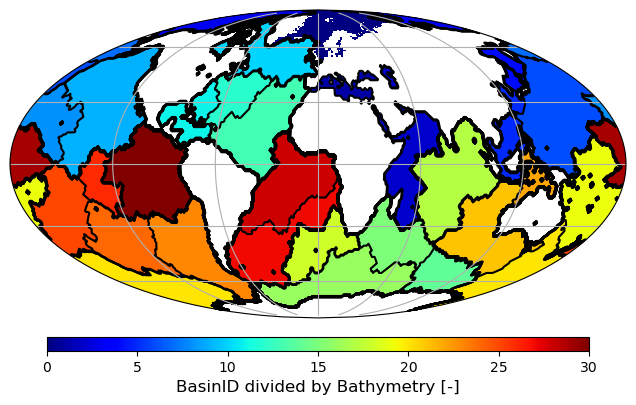

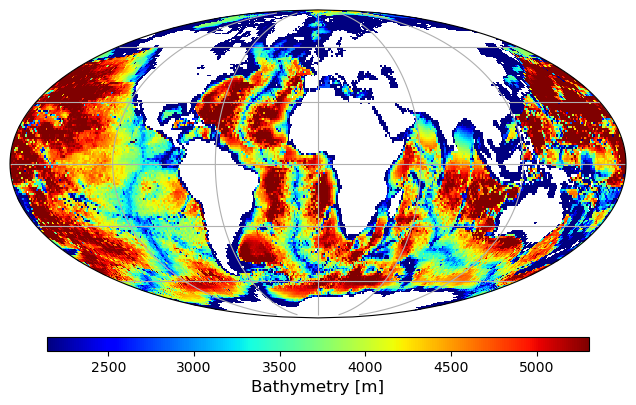

In [1]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset


# Make folder to hold figure results
!mkdir -p figures/DetectionMethods
fldName = EC.utils.makeFolderSeries(fldBase='figures/DetectionMethods/EAgrid_CLGN_Merger_etopo')

print("Storing images in {}".format(fldName))

# Short readme text to write to folder with images
readmetxt = "Note that the bathymetry values are shown with a colorbar that represents 1 std that are area weighted.";
readmetxt += "\nUsing propertyInv/distanceV edge weight";
readmetxt += "\nUsing Louvain-Girvan-Newman algorithm";
readmetxt += "\nLouvain resolution: 1";
readmetxt += "\nGirvan-Newman minimum unisolated basins: 30";
readmetxt += "\nCommunity merger package is EC.utils.mergePackage(package='Lite')";


with open(fldName+"/readme.txt", "w") as text_file:
    text_file.write(readmetxt)


# Initial basin definition class
body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

# Define the equal area node options s.t. salinity is used for edge connections 
#basins.EAinputs['dataGrid'] = os.getcwd()+"/GLORYS12V1/so_average_{0}_{1}m.nc".format(depthRange[0], depthRange[1])
#basins.EAinputs['parameter'] = "z"


# Define basins based on user input boundaries.
# For the Louvain-Girvan-Newman composite algorithm the variable
# minBasinCnt refers to the number of basins to maintain that are
# not completely isolated after running the louvain algorithm.
basins.defineBasins(minBasinCnt = 30,
                    method = "Louvain-Girvan-Newman",
                    reducedRes={"on":True,"factor":1},
                    read=False,
                    write=True,
                    verbose=False)


# Define basin merging criteria
mergerPackage = EC.utils.mergerPackages('Lite');
mergerPackage['mergeSmallBasins']['threshold'] = [0.1, 0.5]
mergerPackage['verbose'] = False;

# Merge communities based off criteria 
basins.applyMergeBasinMethods(mergerID=0, mergerPackage=mergerPackage)

# Convert basinID equal area grid to regular grid
basins.interp2regularGrid(mask=True)


# Plot results of community IDs
EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                    outputDir = os.getcwd()+"/"+fldName,
                    fidName = "plotGlobal_Bathymetry_Basins.png",
                    cmapOpts={"cmap":"jet",
                              "cbar-title":"cbar-title",
                              "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                    pltOpts={"valueType": "BasinID divided by Bathymetry",
                             "valueUnits": "-",
                             "plotTitle":"",
                             "plotZeroContour":False,
                             "plotIntegerContours":True,
                             "transparent":True},
                    savePNG=True,
                    saveSVG=False)


# Write temp.nc that only has lat/lon/value
basins.simplifyNetCDF(inputPath=basins.EAinputs['dataGrid'],
                    outputPath='tempSimp.nc',
                    parameter=basins.EAinputs['parameter'])
# Read netCDF4
nc = Dataset('tempSimp.nc')
XX, YY = np.meshgrid(nc['lon'][:].data, nc['lat'][:].data)

# Calculate area weighted average and standard deviation (for plotting)
areaWeights, longitudes, latitudes, totalArea, totalAreaCalculated = EC.utils.areaWeights(resolution=np.diff(nc['lon'][:].data)[0],
                                                                                          LonStEd = [-180,180],
                                                                                          LatStEd = [-90,90])
ave, std = EC.utils.weightedAvgAndStd(nc['z'][:].data, areaWeights)

# Plot PSU at depth interval
EC.utils.plotGlobal(YY, XX, nc['z'][:].data,
                    outputDir = os.getcwd()+"/"+fldName,
                    fidName = "plotGlobal_Bathymetry.png",
                    cmapOpts={"cmap":"jet",
                              "cbar-title":"cbar-title",
                              "cbar-range":[ave-1*std,
                                            ave+1*std]},
                    pltOpts={"valueType": "Bathymetry",
                             "valueUnits": "m",
                             "plotTitle":"",
                             "plotZeroContour":False,
                             "transparent":True},
                    savePNG=True,
                    saveSVG=False)
nc.close()


"\nplotNodes(basins.Gnew, LNodesLat, LNodesLon,\n          drawEdges=True, showSideEdges=True,\n          fidName='figures/diagrams/process-diagram/LouvainCommunityNodes.png',\n          savePNG=True)\n"

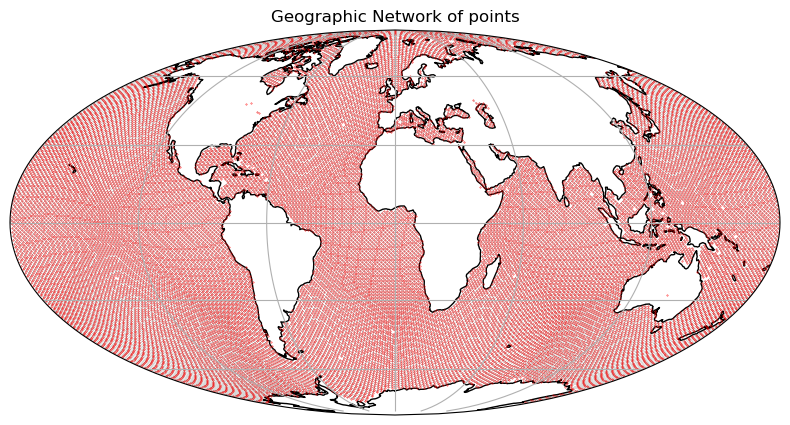

In [153]:
# Create node plot:
#     1) Base 1 degree resolution
#     2) Louvain community nodes (i.e., input to Girvan-Newman)
#
def split_antimeridian_line(lon1, lat1, lon2, lat2):
    """
    Split a line crossing the antimeridian into two segments,
    one in the eastern hemisphere and one in the western.

    Returns:
        western_segment: ((lon_a, lat_a), (lon_b, lat_b)) or None
        eastern_segment: ((lon_c, lat_c), (lon_d, lat_d)) or None
    """
    # Normalize longitudes to [-180, 180]
    lon1 = (lon1 + 180) % 360 - 180
    lon2 = (lon2 + 180) % 360 - 180

    if abs(lon2 - lon1) <= 180:
        # No crossing: return the full segment and None for the other
        if lon1 < 0:
            return ((lon1, lat1), (lon2, lat2)), None
        else:
            return None, ((lon1, lat1), (lon2, lat2))

    # Antimeridian crossing
    # Determine direction of crossing
    if lon1 > lon2:
        lon2 += 360
    else:
        lon1 += 360

    # Interpolation factor for crossing at 180°
    frac = (180 - lon1) / (lon2 - lon1)
    lat_mid = lat1 + frac * (lat2 - lat1)

    # First segment: lon1 -> 180°
    western_segment = ((lon1, lat1), (180, lat_mid))
    # Second segment: -180° -> lon2
    eastern_segment = ((180, lat_mid), (lon2, lat2))

    return western_segment, eastern_segment

def plotNodes(G, latitude, longitude,
              drawEdges=False, showSideEdges=True,
              fidName='test.png', savePNG=False, saveSVG=False):
    
    # Imports
    import cartopy.crs as ccrs # type: ignore
    # Plot the network on a geographic map
    fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.Mollweide()})

    # Draw the edges (connections)
    if drawEdges:
        for edge in G.edges(data=True):
            node1, node2, weight = edge
            lon1, lat1 = longitude[node1], latitude[node1]
            lon2, lat2 = longitude[node2], latitude[node2]
            cutoff = 90;
            if ((lon2<-cutoff) & (lon1>cutoff)) | ((lon1<-cutoff) & (lon2>cutoff)):
                # Node connection passes through antimeridian
                if showSideEdges:
                    lats, lons = split_antimeridian([lon1, lon2], [lat1, lat2])
                    segment1, segment2 = split_antimeridian_line(lon1, lat1, lon2, lat2)
                    ax.plot([segment1[0][0],segment1[1][0]], [segment1[0][1],segment1[1][1]],
                            'k-', linewidth=.1, transform=ccrs.PlateCarree())
                    ax.plot([segment1[0][0],segment1[1][0]], [segment1[0][1],segment1[1][1]],
                            'k-', linewidth=.1, transform=ccrs.PlateCarree())
                pass
            else:
                # Node connection does not pass through antimeridian
                ax.plot([lon1, lon2], [lat1, lat2], 'k-', linewidth=.1, transform=ccrs.PlateCarree())
            
            
    # Draw the nodes (points) on the map
    ax.plot(longitude, latitude, 'ro', markersize=.3, transform=ccrs.PlateCarree())  # longitude, latitude

    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines()

    plt.title("Geographic Network of points")
    
    # Save figure
    if savePNG:
        plt.savefig(fidName, dpi=600, transparent=True)
    if saveSVG:
        plt.savefig(fidName.replace(".png", ".svg"))


###############################
# 1) Base 1 degree resolution #
###############################
# Define node locations (latitude/longitude)
baseNodesLat = np.array([],dtype=float);
baseNodesLon = np.array([],dtype=float);
for x in basins.G:
    baseNodesLat = np.append(baseNodesLat, basins.G.nodes[x]['pos'][0])
    baseNodesLon = np.append(baseNodesLon, basins.G.nodes[x]['pos'][1])

plotNodes(basins.G, baseNodesLat, baseNodesLon,
          drawEdges=True, showSideEdges=True,
          fidName='figures/diagrams/process-diagram/BaseNodes.png',
          savePNG=True)

#############################################################
# 2) Louvain community nodes (i.e., input to Girvan-Newman) #
#############################################################
import copy as cp
LNodesLat = np.array([],dtype=float);
LNodesLon = np.array([],dtype=float);

for x in basins.Gnew:
    # Set nodes idx that are compiled into new nodes for
    # girvan-newman algorithm
    nodesInGnew = np.array(list(basins.Lcommunities[x]), dtype=np.int32)
    # Set average latitude and longitude of nodes in louvain community
    cutoff = 90;
    if (np.min(baseNodesLon[nodesInGnew])<-cutoff) & (np.max(baseNodesLon[nodesInGnew])>cutoff):
        # At the -180,180 boundary find the mean latitude/longitude
        # A mean is fine since nodes represent equal area quadrangles.
        Lons = cp.deepcopy(baseNodesLon[nodesInGnew]);
        Lons[Lons<0] += 360;
        aveLon = np.mean(Lons)
        if aveLon>180:
            aveLon -=360;
    else:
        aveLon = np.mean(baseNodesLon[nodesInGnew])
    
    LNodesLat = np.append(LNodesLat, np.mean(baseNodesLat[nodesInGnew]) )
    LNodesLon = np.append(LNodesLon, aveLon )
'''
plotNodes(basins.Gnew, LNodesLat, LNodesLon,
          drawEdges=True, showSideEdges=True,
          fidName='figures/diagrams/process-diagram/LouvainCommunityNodes.png',
          savePNG=True)
'''

